In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
np.random.seed(42)

In [ ]:
!{sys.executable} -m pip install -U tensorflow==2.7.0
!{sys.executable} -m pip install -U scikeras

     |████████████████████████████████| 489.6 MB 17 kB/s 
     |████████████████████████████████| 463 kB 76.4 MB/s 
     |████████████████████████████████| 1.3 MB 72.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
    Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
      Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Ensure stability across runs
keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
!pip install extra-keras-datasets
import tensorflow as tf
from tensorflow import keras
from extra_keras_datasets import emnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = emnist.load_data(type = 'byclass')

print('Train shape', X_train.shape, y_train.shape)
print('Test shape', X_test.shape, y_test.shape)

INFO:root:Loading dataset = emnist


743915520/743900280 [==============================] - 7s 0us/step


Train shape (697932, 28, 28) (697932,)
Test shape (116323, 28, 28) (116323,)


In [ ]:
X_train, X_drop, y_train, y_drop = train_test_split(X_train, y_train, train_size=0.1)
X_test, X_drop, y_test, y_drop = train_test_split(X_test, y_test, train_size=0.1)

In [ ]:
X_train.shape

(69793, 28, 28)

In [ ]:
# Preprocessing-normalization
X_train_norm = X_train / 255.
X_test_norm = X_test / 255.

In [ ]:
nsamples, nx, ny = X_train_norm.shape
X_train_svm = X_train_norm.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test_norm.shape
X_test_svm = X_test_norm.reshape((nsamples,nx*ny))

# split training data into training and validation
X_train_svm, X_v_svm, y_train_svm, y_v_svm = train_test_split(X_train_svm, y_train, train_size=0.85)

In [ ]:
X_train_svm.shape

(59324, 784)

In [ ]:
# Add an extra dimension to our data
X_train = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1],X_train_norm.shape[2],1))
X_test = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1],X_test_norm.shape[2],1))

print("Reshape of X_train:", X_train.shape)
print("Reshape of X_test:", X_test.shape)

Reshape of X_train: (69793, 28, 28, 1)
Reshape of X_test: (11632, 28, 28, 1)


In [ ]:
# split training data into training and validation
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, train_size=0.85)

In [ ]:
def build_cnn(
    activation_function="relu", input_shape=[28,28]
):
    """Build a Keras MLP for 10 class classification with desired parameters."""
    
    model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),

    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(70, activation="softmax"),
])
    
    return model


In [ ]:
from scikeras.wrappers import KerasClassifier
keras_classifier = KerasClassifier(build_cnn,
                                   activation_function="relu",
                                   loss="sparse_categorical_crossentropy",
                                   optimizer="adam",
                                   optimizer__lr=0.01,
                                   metrics=["accuracy"]
                                  )

In [ ]:
from sklearn.model_selection import GridSearchCV
# define the grid search parameters
batch_size = [64,128,256]
epochs = [5, 10]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=keras_classifier, param_grid=param_grid,cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
618/618 [==============================] - 6s 9ms/step - loss: 1.0603 - accuracy: 0.6977
Epoch 2/5
618/618 [==============================] - 6s 9ms/step - loss: 0.7508 - accuracy: 0.7645
Epoch 3/5
618/618 [==============================] - 6s 9ms/step - loss: 0.6892 - accuracy: 0.7792
Epoch 4/5
618/618 [==============================] - 6s 9ms/step - loss: 0.6547 - accuracy: 0.7876
Epoch 5/5
309/309 [==============================] - 1s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
618/618 [==============================] - 6s 10ms/step - loss: 1.0773 - accuracy: 0.6932
Epoch 2/5
618/618 [==============================] - 6s 10ms/step - loss: 0.7502 - accuracy: 0.7635
Epoch 3/5
618/618 [==============================] - 6s 10ms/step - loss: 0.6964 - accuracy: 0.7792
Epoch 4/5
618/618 [==============================] - 6s 10ms/step - loss: 0.6561 - accuracy: 0.7876
Epoch 5/5
309/309 [==============================] - 1s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
618/618 [==============================] - 6s 10ms/step - loss: 1.0849 - accuracy: 0.6913
Epoch 2/5
618/618 [==============================] - 6s 10ms/step - loss: 0.7577 - accuracy: 0.7631
Epoch 3/5
618/618 [==============================] - 6s 10ms/step - loss: 0.6981 - accuracy: 0.7766
Epoch 4/5
618/618 [==============================] - 6s 10ms/step - loss: 0.6600 - accuracy: 0.7823
Epoch 5/5
309/309 [==============================] - 1s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
618/618 [==============================] - 7s 10ms/step - loss: 1.0458 - accuracy: 0.6995
Epoch 2/10
618/618 [==============================] - 6s 10ms/step - loss: 0.7224 - accuracy: 0.7726
Epoch 3/10
618/618 [==============================] - 6s 10ms/step - loss: 0.6676 - accuracy: 0.7822
Epoch 4/10
618/618 [==============================] - 6s 10ms/step - loss: 0.6359 - accuracy: 0.7896
Epoch 5/10
618/618 [==============================] - 6s 10ms/step - loss: 0.6173 - accuracy: 0.7937
Epoch 6/10
618/618 [==============================] - 6s 10ms/step - loss: 0.5991 - accuracy: 0.7989
Epoch 7/10
618/618 [==============================] - 6s 10ms/step - loss: 0.5848 - accuracy: 0.8016
Epoch 8/10
618/618 [==============================] - 6s 10ms/step - loss: 0.5802 - accuracy: 0.8024
Epoch 9/10
618/618 [==============================] - 6s 10ms/step - loss: 0.5707 - accuracy: 0.8066
Epoch 10/10
309/309 [==============================] - 1s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
618/618 [==============================] - 7s 10ms/step - loss: 1.0780 - accuracy: 0.6937
Epoch 2/10
618/618 [==============================] - 6s 10ms/step - loss: 0.7400 - accuracy: 0.7684
Epoch 3/10
618/618 [==============================] - 6s 10ms/step - loss: 0.6840 - accuracy: 0.7788
Epoch 4/10
618/618 [==============================] - 6s 10ms/step - loss: 0.6506 - accuracy: 0.7871
Epoch 5/10
618/618 [==============================] - 7s 11ms/step - loss: 0.6281 - accuracy: 0.7922
Epoch 6/10
618/618 [==============================] - 7s 11ms/step - loss: 0.6078 - accuracy: 0.7959
Epoch 7/10
618/618 [==============================] - 7s 11ms/step - loss: 0.5915 - accuracy: 0.8019
Epoch 8/10
618/618 [==============================] - 7s 11ms/step - loss: 0.5860 - accuracy: 0.8006
Epoch 9/10
618/618 [==============================] - 7s 11ms/step - loss: 0.5718 - accuracy: 0.8061
Epoch 10/10
309/309 [==============================] - 1s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
618/618 [==============================] - 7s 11ms/step - loss: 1.0763 - accuracy: 0.6912
Epoch 2/10
618/618 [==============================] - 7s 11ms/step - loss: 0.7413 - accuracy: 0.7668
Epoch 3/10
618/618 [==============================] - 7s 11ms/step - loss: 0.6816 - accuracy: 0.7799
Epoch 4/10
618/618 [==============================] - 7s 11ms/step - loss: 0.6505 - accuracy: 0.7885
Epoch 5/10
618/618 [==============================] - 7s 11ms/step - loss: 0.6238 - accuracy: 0.7949
Epoch 6/10
618/618 [==============================] - 7s 11ms/step - loss: 0.6181 - accuracy: 0.7952
Epoch 7/10
618/618 [==============================] - 7s 11ms/step - loss: 0.6020 - accuracy: 0.7996
Epoch 8/10
618/618 [==============================] - 7s 11ms/step - loss: 0.5893 - accuracy: 0.8033
Epoch 9/10
618/618 [==============================] - 7s 11ms/step - loss: 0.5752 - accuracy: 0.8055
Epoch 10/10
309/309 [==============================] - 1s 4ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
309/309 [==============================] - 5s 16ms/step - loss: 1.0906 - accuracy: 0.6913
Epoch 2/5
309/309 [==============================] - 5s 16ms/step - loss: 0.7054 - accuracy: 0.7741
Epoch 3/5
309/309 [==============================] - 5s 16ms/step - loss: 0.6337 - accuracy: 0.7937
Epoch 4/5
309/309 [==============================] - 5s 16ms/step - loss: 0.5968 - accuracy: 0.8028
Epoch 5/5
155/155 [==============================] - 1s 5ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
309/309 [==============================] - 6s 17ms/step - loss: 1.0940 - accuracy: 0.6921
Epoch 2/5
309/309 [==============================] - 5s 16ms/step - loss: 0.7263 - accuracy: 0.7710
Epoch 3/5
309/309 [==============================] - 5s 16ms/step - loss: 0.6529 - accuracy: 0.7902
Epoch 4/5
309/309 [==============================] - 5s 16ms/step - loss: 0.6141 - accuracy: 0.7992
Epoch 5/5
155/155 [==============================] - 1s 5ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
309/309 [==============================] - 5s 16ms/step - loss: 1.0829 - accuracy: 0.6936
Epoch 2/5
309/309 [==============================] - 5s 16ms/step - loss: 0.6979 - accuracy: 0.7785
Epoch 3/5
309/309 [==============================] - 5s 16ms/step - loss: 0.6391 - accuracy: 0.7929
Epoch 4/5
309/309 [==============================] - 5s 16ms/step - loss: 0.5954 - accuracy: 0.8038
Epoch 5/5
155/155 [==============================] - 1s 5ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
309/309 [==============================] - 5s 16ms/step - loss: 1.0903 - accuracy: 0.6929
Epoch 2/10
309/309 [==============================] - 5s 16ms/step - loss: 0.7242 - accuracy: 0.7740
Epoch 3/10
309/309 [==============================] - 5s 16ms/step - loss: 0.6533 - accuracy: 0.7878
Epoch 4/10
309/309 [==============================] - 5s 17ms/step - loss: 0.6167 - accuracy: 0.7959
Epoch 5/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5822 - accuracy: 0.8052
Epoch 6/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5670 - accuracy: 0.8097
Epoch 7/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5513 - accuracy: 0.8129
Epoch 8/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5371 - accuracy: 0.8178
Epoch 9/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5269 - accuracy: 0.8192
Epoch 10/10
155/155 [==============================] - 1s 5ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
309/309 [==============================] - 5s 16ms/step - loss: 1.0723 - accuracy: 0.6978
Epoch 2/10
309/309 [==============================] - 5s 16ms/step - loss: 0.6980 - accuracy: 0.7782
Epoch 3/10
309/309 [==============================] - 5s 16ms/step - loss: 0.6307 - accuracy: 0.7964
Epoch 4/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5947 - accuracy: 0.8020
Epoch 5/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5575 - accuracy: 0.8130
Epoch 6/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5493 - accuracy: 0.8148
Epoch 7/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5318 - accuracy: 0.8164
Epoch 8/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5178 - accuracy: 0.8215
Epoch 9/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5075 - accuracy: 0.8237
Epoch 10/10
155/155 [==============================] - 1s 5ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
309/309 [==============================] - 5s 15ms/step - loss: 1.0635 - accuracy: 0.6986
Epoch 2/10
309/309 [==============================] - 5s 15ms/step - loss: 0.7025 - accuracy: 0.7779
Epoch 3/10
309/309 [==============================] - 5s 16ms/step - loss: 0.6354 - accuracy: 0.7922
Epoch 4/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5953 - accuracy: 0.8030
Epoch 5/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5796 - accuracy: 0.8075
Epoch 6/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5574 - accuracy: 0.8113
Epoch 7/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5401 - accuracy: 0.8121
Epoch 8/10
309/309 [==============================] - 5s 16ms/step - loss: 0.5275 - accuracy: 0.8177
Epoch 9/10
309/309 [==============================] - 5s 17ms/step - loss: 0.5193 - accuracy: 0.8223
Epoch 10/10
155/155 [==============================] - 1s 6ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
155/155 [==============================] - 4s 24ms/step - loss: 1.2337 - accuracy: 0.6576
Epoch 2/5
155/155 [==============================] - 4s 24ms/step - loss: 0.7218 - accuracy: 0.7734
Epoch 3/5
155/155 [==============================] - 4s 23ms/step - loss: 0.6416 - accuracy: 0.7909
Epoch 4/5
155/155 [==============================] - 4s 23ms/step - loss: 0.5951 - accuracy: 0.8037
Epoch 5/5
78/78 [==============================] - 1s 8ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
155/155 [==============================] - 4s 24ms/step - loss: 1.0958 - accuracy: 0.6925
Epoch 2/5
155/155 [==============================] - 4s 24ms/step - loss: 0.6668 - accuracy: 0.7865
Epoch 3/5
155/155 [==============================] - 4s 24ms/step - loss: 0.6037 - accuracy: 0.8025
Epoch 4/5
155/155 [==============================] - 4s 24ms/step - loss: 0.5631 - accuracy: 0.8112
Epoch 5/5
78/78 [==============================] - 1s 8ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
155/155 [==============================] - 4s 25ms/step - loss: 1.2094 - accuracy: 0.6647
Epoch 2/5
155/155 [==============================] - 4s 24ms/step - loss: 0.7028 - accuracy: 0.7776
Epoch 3/5
155/155 [==============================] - 4s 24ms/step - loss: 0.6199 - accuracy: 0.7969
Epoch 4/5
155/155 [==============================] - 4s 24ms/step - loss: 0.5786 - accuracy: 0.8078
Epoch 5/5
78/78 [==============================] - 1s 7ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
155/155 [==============================] - 4s 23ms/step - loss: 1.1987 - accuracy: 0.6671
Epoch 2/10
155/155 [==============================] - 4s 23ms/step - loss: 0.7092 - accuracy: 0.7749
Epoch 3/10
155/155 [==============================] - 4s 23ms/step - loss: 0.6344 - accuracy: 0.7934
Epoch 4/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5891 - accuracy: 0.8054
Epoch 5/10
155/155 [==============================] - 3s 22ms/step - loss: 0.5636 - accuracy: 0.8097
Epoch 6/10
155/155 [==============================] - 3s 22ms/step - loss: 0.5395 - accuracy: 0.8155
Epoch 7/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5192 - accuracy: 0.8218
Epoch 8/10
155/155 [==============================] - 3s 23ms/step - loss: 0.4990 - accuracy: 0.8258
Epoch 9/10
155/155 [==============================] - 4s 23ms/step - loss: 0.4919 - accuracy: 0.8302
Epoch 10/10
78/78 [==============================] - 1s 7ms/step
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


155/155 [==============================] - 4s 23ms/step - loss: 1.1870 - accuracy: 0.6719
Epoch 2/10
155/155 [==============================] - 4s 23ms/step - loss: 0.7057 - accuracy: 0.7763
Epoch 3/10
155/155 [==============================] - 4s 23ms/step - loss: 0.6289 - accuracy: 0.7969
Epoch 4/10
155/155 [==============================] - 3s 22ms/step - loss: 0.5858 - accuracy: 0.8060
Epoch 5/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5605 - accuracy: 0.8115
Epoch 6/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5385 - accuracy: 0.8185
Epoch 7/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5198 - accuracy: 0.8217
Epoch 8/10
155/155 [==============================] - 4s 23ms/step - loss: 0.4977 - accuracy: 0.8298
Epoch 9/10
155/155 [==============================] - 4s 23ms/step - loss: 0.4840 - accuracy: 0.8297
Epoch 10/10
78/78 [==============================] - 1s 7ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
155/155 [==============================] - 4s 22ms/step - loss: 1.1532 - accuracy: 0.6777
Epoch 2/10
155/155 [==============================] - 3s 22ms/step - loss: 0.7098 - accuracy: 0.7746
Epoch 3/10
155/155 [==============================] - 4s 23ms/step - loss: 0.6403 - accuracy: 0.7924
Epoch 4/10
155/155 [==============================] - 3s 22ms/step - loss: 0.5962 - accuracy: 0.8043
Epoch 5/10
155/155 [==============================] - 3s 22ms/step - loss: 0.5667 - accuracy: 0.8098
Epoch 6/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5424 - accuracy: 0.8170
Epoch 7/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5329 - accuracy: 0.8186
Epoch 8/10
155/155 [==============================] - 4s 23ms/step - loss: 0.5141 - accuracy: 0.8229
Epoch 9/10
155/155 [==============================] - 3s 23ms/step - loss: 0.5012 - accuracy: 0.8252
Epoch 10/10
78/78 [==============================] - 1s 8ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
464/464 [==============================] - 7s 15ms/step - loss: 0.9773 - accuracy: 0.7172
Epoch 2/10
464/464 [==============================] - 7s 15ms/step - loss: 0.6817 - accuracy: 0.7825
Epoch 3/10
464/464 [==============================] - 7s 15ms/step - loss: 0.6184 - accuracy: 0.7966
Epoch 4/10
464/464 [==============================] - 7s 15ms/step - loss: 0.5899 - accuracy: 0.8064
Epoch 5/10
464/464 [==============================] - 7s 15ms/step - loss: 0.5645 - accuracy: 0.8120
Epoch 6/10
464/464 [==============================] - 7s 15ms/step - loss: 0.5532 - accuracy: 0.8126
Epoch 7/10
464/464 [==============================] - 7s 15ms/step - loss: 0.5442 - accuracy: 0.8153
Epoch 8/10
464/464 [==============================] - 7s 15ms/step - loss: 0.5313 - accuracy: 0.8188
Epoch 9/10
464/464 [==============================] - 7s 14ms/step - loss: 0.5327 - accuracy: 0.8158
Epoch 10/10
464/464 [==============================] - 7s 14ms/step - loss: 0.5170 - accura

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.831990 using {'batch_size': 128, 'epochs': 10}


In [ ]:
from sklearn.model_selection import GridSearchCV

activation_function =  ["relu", "sigmoid", "tanh"]
optimizer__lr=[0.001, 0.01, 0.1,0.2,0.3]

param_grid = dict(activation_function = activation_function, optimizer__lr = optimizer__lr )
grid = GridSearchCV(estimator=keras_classifier, param_grid=param_grid,cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 2ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


618/618 [==============================] - 2s 3ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1854/1854 [==============================] - 16s 9ms/step - loss: 1.0295 - accuracy: 0.7028


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.789006 using {'activation_function': 'tanh', 'optimizer__lr': 0.001}


In [ ]:
from keras import optimizers
from tensorflow import keras
from tensorflow.keras import layers
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),

    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="tanh"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="tanh"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(70, activation="softmax"),
])
optm = tf.keras.optimizers.Adam(learning_rate=0.01)
# Compile model, optimze the speed by using Adam optimiser
cnn_model.compile(optimizer=optm,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
cnn_model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 5, 5, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_65 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_65 (Dropout)        (None, 1600)            

In [ ]:
# Train the model 
epochs = 10
batch_size = 128
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_v, y_v))

Epoch 1/10
464/464 [==============================] - 9s 18ms/step - loss: 1.0193 - accuracy: 0.7052 - val_loss: 0.7101 - val_accuracy: 0.7802
Epoch 2/10
464/464 [==============================] - 8s 17ms/step - loss: 0.8106 - accuracy: 0.7558 - val_loss: 0.7138 - val_accuracy: 0.7773
Epoch 3/10
464/464 [==============================] - 8s 17ms/step - loss: 0.7918 - accuracy: 0.7608 - val_loss: 0.7034 - val_accuracy: 0.7843
Epoch 4/10
464/464 [==============================] - 8s 17ms/step - loss: 0.7976 - accuracy: 0.7594 - val_loss: 0.6538 - val_accuracy: 0.8004
Epoch 5/10
464/464 [==============================] - 8s 17ms/step - loss: 0.7901 - accuracy: 0.7628 - val_loss: 0.7078 - val_accuracy: 0.7928
Epoch 6/10
464/464 [==============================] - 8s 17ms/step - loss: 0.7762 - accuracy: 0.7644 - val_loss: 0.7609 - val_accuracy: 0.7673
Epoch 7/10
464/464 [==============================] - 8s 17ms/step - loss: 0.8002 - accuracy: 0.7620 - val_loss: 0.6676 - val_accuracy: 0.7941

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

364/364 [==============================] - 1s 3ms/step - loss: 0.7064 - accuracy: 0.7892
Accuracy on test data: 0.7892


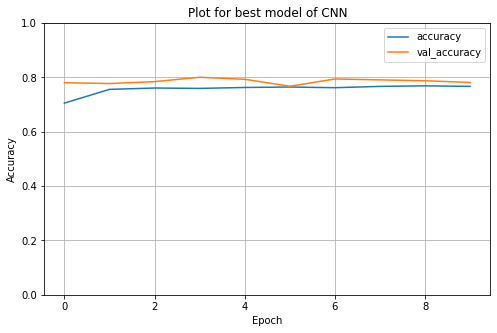

In [ ]:
import pandas as pd
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Plot for best model of CNN')
plt.show()

In [ ]:
def build_mlp(
    n_hidden_layers=3, n_hidden_neurons=20,
    activation_function="relu", input_shape=[28,28]
):
    
    model = keras.models.Sequential()
   
    model.add(keras.layers.Flatten(input_shape=[28, 28]))

    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_hidden_neurons, activation="relu"))

    model.add(keras.layers.Dense(70, activation="softmax"))
    
    return model

In [ ]:
from scikeras.wrappers import KerasClassifier
mlp_classifier = KerasClassifier(build_mlp,
                                   n_hidden_layers=3,
                                   n_hidden_neurons=50,
                                   activation_function="relu",
                                   loss="sparse_categorical_crossentropy",
                                   optimizer="adam",
                                   optimizer__lr=0.01,
                                   metrics=["accuracy"]
                                  )

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_hidden_layers":[2,5,10],
#     "n_hidden_neurons": [20,50,10],
#     "optimizer__lr": [0.1, 0.01],
#     "activation_function": ["relu", "sigmoid", "tanh"]
# }

# grid_search_cv = GridSearchCV(mlp_classifier, param_grid, cv=3)
# grid_search_cv.fit(X_train, y_train, epochs=5)

In [ ]:
# # summarize results
# print("Best: %f using %s" % (grid_search_cv.best_score_, grid_search_cv.best_params_))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "optimizer__lr": [0.1, 0.01],
    "activation_function": ["relu", "sigmoid", "tanh"]
}

grid_search_cv = GridSearchCV(mlp_classifier, param_grid, cv=3)
grid_search_cv.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.3210 - accuracy: 0.1411
Epoch 2/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.2794 - accuracy: 0.1267
Epoch 3/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.3875 - accuracy: 0.1038
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.5213 - accuracy: 0.0850
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7835 - accuracy: 0.0493
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7122 - accuracy: 0.0500
Epoch 3/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7122 - accuracy: 0.0505
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7118 - accuracy: 0.0513
Epoch 5/5
618/618 [==============================] - 1s 960us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7735 - accuracy: 0.0499
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7137 - accuracy: 0.0509
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7138 - accuracy: 0.0494
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7122 - accuracy: 0.0515
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5384 - accuracy: 0.5735
Epoch 2/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.2328 - accuracy: 0.6431
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1757 - accuracy: 0.6619
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1612 - accuracy: 0.6677
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5419 - accuracy: 0.5738
Epoch 2/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.2362 - accuracy: 0.6416
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1859 - accuracy: 0.6566
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1821 - accuracy: 0.6631
Epoch 5/5
618/618 [==============================] - 1s 978us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5511 - accuracy: 0.5720
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2415 - accuracy: 0.6424
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1781 - accuracy: 0.6607
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1586 - accuracy: 0.6650
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7650 - accuracy: 0.0503
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7143 - accuracy: 0.0505
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7154 - accuracy: 0.0509
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7122 - accuracy: 0.0503
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.6255 - accuracy: 0.0929
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7121 - accuracy: 0.0500
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7121 - accuracy: 0.0506
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7118 - accuracy: 0.0513
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7573 - accuracy: 0.0634
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7136 - accuracy: 0.0509
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7138 - accuracy: 0.0495
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7122 - accuracy: 0.0515
Epoch 5/5
618/618 [==============================] - 1s 966us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5327 - accuracy: 0.5739
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2154 - accuracy: 0.6505
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1668 - accuracy: 0.6676
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1302 - accuracy: 0.6728
Epoch 5/5
618/618 [==============================] - 1s 989us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5621 - accuracy: 0.5714
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2545 - accuracy: 0.6409
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2016 - accuracy: 0.6569
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1726 - accuracy: 0.6641
Epoch 5/5
618/618 [==============================] - 1s 987us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5865 - accuracy: 0.5637
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2541 - accuracy: 0.6379
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1868 - accuracy: 0.6553
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1564 - accuracy: 0.6652
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7836 - accuracy: 0.0496
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7130 - accuracy: 0.0507
Epoch 3/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7135 - accuracy: 0.0510
Epoch 4/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7122 - accuracy: 0.0503
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.4103 - accuracy: 0.1189
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.2031 - accuracy: 0.1579
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.2100 - accuracy: 0.1600
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.1982 - accuracy: 0.1563
Epoch 5/5
618/618 [==============================] - 1s 993us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 3.7719 - accuracy: 0.0494
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7137 - accuracy: 0.0508
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7138 - accuracy: 0.0495
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 3.7122 - accuracy: 0.0515
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5325 - accuracy: 0.5752
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2191 - accuracy: 0.6479
Epoch 3/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.1684 - accuracy: 0.6612
Epoch 4/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.1282 - accuracy: 0.6735
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5838 - accuracy: 0.5628
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2520 - accuracy: 0.6405
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1713 - accuracy: 0.6614
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1479 - accuracy: 0.6674
Epoch 5/5
618/618 [==============================] - 1s 996us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5612 - accuracy: 0.5693
Epoch 2/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.2141 - accuracy: 0.6491
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1607 - accuracy: 0.6647
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1204 - accuracy: 0.6724
Epoch 5/5
618/618 [==============================] - 1s 988us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1854/1854 [==============================] - 4s 2ms/step - loss: 1.4693 - accuracy: 0.5887
Epoch 2/5
1854/1854 [==============================] - 4s 2ms/step - loss: 1.2044 - accuracy: 0.6567
Epoch 3/5
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1714 - accuracy: 0.6643
Epoch 4/5
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1468 - accuracy: 0.6716
Epoch 5/5
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1341 - accuracy: 0.6769


GridSearchCV(cv=3,
             estimator=KerasClassifier(activation_function='relu', loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_mlp at 0x7f529c8560e0>, n_hidden_layers=3, n_hidden_neurons=50, optimizer='adam', optimizer__lr=0.01),
             param_grid={'activation_function': ['relu', 'sigmoid', 'tanh'],
                         'optimizer__lr': [0.1, 0.01]})

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_search_cv.best_score_, grid_search_cv.best_params_))

Best: 0.660610 using {'activation_function': 'tanh', 'optimizer__lr': 0.01}


In [ ]:
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=mlp_classifier, verbose=0)
# define the grid search parameters
epochs = [5, 10]
param_grid = dict(epochs=epochs)
grid = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid,cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5519 - accuracy: 0.5707
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2294 - accuracy: 0.6455
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1665 - accuracy: 0.6647
Epoch 4/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.1451 - accuracy: 0.6709
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5473 - accuracy: 0.5763
Epoch 2/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2200 - accuracy: 0.6532
Epoch 3/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.1688 - accuracy: 0.6665
Epoch 4/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.1479 - accuracy: 0.6731
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5567 - accuracy: 0.5690
Epoch 2/5
1236/1236 [==============================] - 3s 2ms/step - loss: 1.2379 - accuracy: 0.6426
Epoch 3/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1710 - accuracy: 0.6615
Epoch 4/5
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1411 - accuracy: 0.6678
Epoch 5/5
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5605 - accuracy: 0.5732
Epoch 2/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2517 - accuracy: 0.6426
Epoch 3/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1895 - accuracy: 0.6573
Epoch 4/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1563 - accuracy: 0.6679
Epoch 5/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1602 - accuracy: 0.6682
Epoch 6/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1330 - accuracy: 0.6750
Epoch 7/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1242 - accuracy: 0.6776
Epoch 8/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1302 - accuracy: 0.6775
Epoch 9/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1344 - accuracy: 0.6766
Epoch 10/10
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5783 - accuracy: 0.5666
Epoch 2/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2396 - accuracy: 0.6402
Epoch 3/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1775 - accuracy: 0.6599
Epoch 4/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1534 - accuracy: 0.6680
Epoch 5/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1387 - accuracy: 0.6721
Epoch 6/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1338 - accuracy: 0.6753
Epoch 7/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1264 - accuracy: 0.6786
Epoch 8/10
1236/1236 [==============================] - 3s 2ms/step - loss: 1.1142 - accuracy: 0.6822
Epoch 9/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1232 - accuracy: 0.6799
Epoch 10/10
618/618 [==============================] - 1s 990us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1236/1236 [==============================] - 3s 2ms/step - loss: 1.5757 - accuracy: 0.5634
Epoch 2/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.2604 - accuracy: 0.6400
Epoch 3/10
1236/1236 [==============================] - 3s 2ms/step - loss: 1.1965 - accuracy: 0.6539
Epoch 4/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1652 - accuracy: 0.6635
Epoch 5/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1398 - accuracy: 0.6723
Epoch 6/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1288 - accuracy: 0.6736
Epoch 7/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1208 - accuracy: 0.6785
Epoch 8/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1036 - accuracy: 0.6802
Epoch 9/10
1236/1236 [==============================] - 2s 2ms/step - loss: 1.1051 - accuracy: 0.6832
Epoch 10/10
618/618 [==============================] - 1s 1ms/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1854/1854 [==============================] - 5s 2ms/step - loss: 1.4987 - accuracy: 0.5818
Epoch 2/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.2248 - accuracy: 0.6492
Epoch 3/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1885 - accuracy: 0.6571
Epoch 4/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1631 - accuracy: 0.6662
Epoch 5/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1603 - accuracy: 0.6671
Epoch 6/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1470 - accuracy: 0.6732
Epoch 7/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1345 - accuracy: 0.6772
Epoch 8/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1354 - accuracy: 0.6777
Epoch 9/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.1328 - accuracy: 0.6799
Epoch 10/10
1854/1854 [==============================] - 4s 2ms/step - loss: 1.137

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.671634 using {'epochs': 10}


In [ ]:
from keras import optimizers
from tensorflow import keras
from tensorflow.keras import layers
mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(70, activation="softmax")
])
optm = tf.keras.optimizers.Adam(learning_rate=0.01)
# Compile model, optimze the speed by using Adam optimiser
mlp_model.compile(optimizer=optm,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model 
epochs = 10
history = mlp_model.fit(X_train, y_train, 
                    epochs=epochs, validation_data=(X_v, y_v))

Epoch 1/10
1854/1854 [==============================] - 6s 3ms/step - loss: 1.1274 - accuracy: 0.6732 - val_loss: 0.8621 - val_accuracy: 0.7278
Epoch 2/10
1854/1854 [==============================] - 6s 3ms/step - loss: 0.7912 - accuracy: 0.7473 - val_loss: 0.8142 - val_accuracy: 0.7442
Epoch 3/10
1854/1854 [==============================] - 6s 3ms/step - loss: 0.7384 - accuracy: 0.7598 - val_loss: 0.8304 - val_accuracy: 0.7380
Epoch 4/10
1854/1854 [==============================] - 6s 3ms/step - loss: 0.7178 - accuracy: 0.7657 - val_loss: 0.8010 - val_accuracy: 0.7494
Epoch 5/10
1854/1854 [==============================] - 6s 3ms/step - loss: 0.6954 - accuracy: 0.7734 - val_loss: 0.7843 - val_accuracy: 0.7499
Epoch 6/10
1854/1854 [==============================] - 6s 3ms/step - loss: 0.6801 - accuracy: 0.7769 - val_loss: 0.7776 - val_accuracy: 0.7495
Epoch 7/10
1854/1854 [==============================] - 6s 3ms/step - loss: 0.6763 - accuracy: 0.7777 - val_loss: 0.8136 - val_accuracy:

In [ ]:
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

364/364 [==============================] - 1s 2ms/step - loss: 0.7435 - accuracy: 0.7643
Accuracy on test data: 0.7643


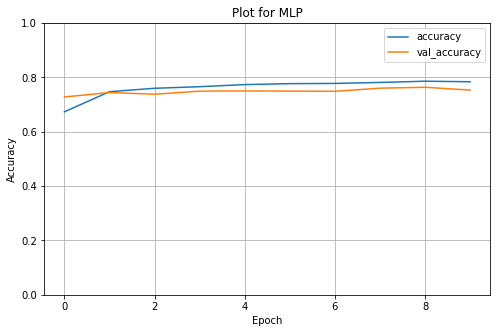

In [ ]:
import pandas as pd
# Convert the history dictionary to a Pandas dataframe and extract the accuracies
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
# Plot the accuracies
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Plot for MLP')
plt.show()

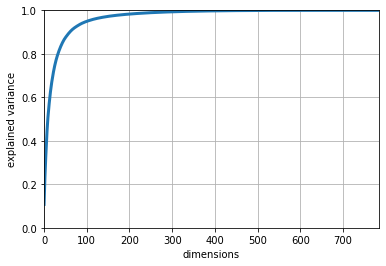

In [ ]:
#pca
from sklearn.decomposition import PCA
# Perform PCA without reducing dimensionality
pca = PCA()
pca.fit(X_train_svm)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance vs number of dimensions

plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 784, 0, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9).fit(X_train_svm)

X_train_pca = pca.transform(X_train_svm)
X_v_pca = pca.transform(X_v_svm)

print("Original shape of training data: {}".format(str(X_train_svm.shape)))
print("Reduced shape of training data: {}".format(str(X_train_pca.shape)))

Original shape of training data: (59324, 784)
Reduced shape of training data: (59324, 62)


In [ ]:
## choose polynomial kernal for grid search
from sklearn.metrics import accuracy_score
## Build svm model, as svm has linear, polynomial and RBF, try all of them and find the one that provide best accuracy
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10],
              'gamma': [1,0.01],
              'kernel': ['rbf']}
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train_pca, y_train_svm)
print("Test set score: {:.2f}".format(grid_search.score(X_v_pca, y_v_svm)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'C': [0.1, 1, 10], 'gamma': [1, 0.01], 'kernel': ['rbf']}
Test set score: 0.82
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.82
Best estimator:
SVC(C=10, gamma=0.01)


In [ ]:
grid_search.cv_results_

In [ ]:
svm_rbf_accuracy =[]
svm_rbf_time = []
for i in range(len(param_grid['C'])):
    svm_rbf_accuracy.append(grid_search.cv_results_['mean_test_score'][i])
    svm_rbf_time.append(grid_search.cv_results_['mean_fit_time'][i]+grid_search.cv_results_['mean_score_time'][i])
    i  = i+1

In [ ]:

plt.plot(param_grid['C'], svm_rbf_accuracy)
plt.xticks(param_grid['C'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy score (rbf-SVM)")
plt.grid(True)

In [ ]:
#Time
plt.plot(param_grid['C'], svm_rbf_time)
plt.xticks(param_grid['C'])
plt.xlabel("C")
plt.ylabel("Time(s)")
plt.title("The Running time of rbf SVM")
plt.grid(True)
plt.show()#

In [ ]:
## choose polynomial kernal for grid search
from sklearn.metrics import accuracy_score
## Build svm model, as svm has linear, polynomial and RBF, try all of them and find the one that provide best accuracy
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10],
              'gamma': [1,0.01],
              'kernel': ['poly']}
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(kernel="poly", degree=2), param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train_pca, y_train_svm)
print("Test set score: {:.2f}".format(grid_search.score(X_v_pca, y_v_svm)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
grid_search.cv_results_

In [ ]:
svm_poly_accuracy =[]
svm_poly_time = []
for i in range(len(param_grid['C'])):
    svm_poly_accuracy.append(grid_search.cv_results_['mean_test_score'][i])
    svm_poly_time.append(grid_search.cv_results_['mean_fit_time'][i]+grid_search.cv_results_['mean_score_time'][i])
    i  = i+1

In [ ]:
plt.plot(param_grid['C'], svm_poly_accuracy)
plt.xticks(param_grid['C'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy score (Linear-SVM)")
plt.grid(True)

In [ ]:
#Time
plt.plot(param_grid['C'], svm_poly_time)
plt.xticks(param_grid['C'])
plt.xlabel("C")
plt.ylabel("Time(s)")
plt.title("The Running time of linear SVM")
plt.grid(True)
plt.show()#

In [ ]:
## choose polynomial kernal for grid search
from sklearn.metrics import accuracy_score
## Build svm model, as svm has linear, polynomial and RBF, try all of them and find the one that provide best accuracy
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10],
              'kernel': ['linear']}
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(kernel="linear"), param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train_pca, y_train_svm)
print("Test set score: {:.2f}".format(grid_search.score(X_v_pca, y_v_svm)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
grid_search.cv_results_

In [ ]:
svm_linear_accuracy =[]
svm_linear_time = []
for i in range(len(param_grid['C'])):
    svm_linear_accuracy.append(grid_search.cv_results_['mean_test_score'][i])
    svm_linear_time.append(grid_search.cv_results_['mean_fit_time'][i]+grid_search.cv_results_['mean_score_time'][i])
    i  = i+1

In [ ]:

plt.plot(param_grid['C'], svm_linear_accuracy)
plt.xticks(param_grid['C'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy score (Linear-SVM)")
plt.grid(True)

In [ ]:
#Time
plt.plot(param_grid['C'], svm_linear_time)
plt.xticks(param_grid['C'])
plt.xlabel("C")
plt.ylabel("Time(s)")
plt.title("The Running time of linear SVM")


plt.grid(True)

plt.show()